
 <img src='salary_img.jpg' />

<h1 style="color:#2C3E50">IMPORTING NECESSARY LIBRARIES</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<h1 style="color:#2C3E50">IMPORTING DATASETS</h1>

In [2]:
# Importing main data 
df=pd.read_csv('https://raw.githubusercontent.com/fractalpriyanka/Salary-Prediction-Model/main/ML%20case%20Study.csv',header=0)

# Importing College data 
colleges=pd.read_csv('https://raw.githubusercontent.com/fractalpriyanka/Salary-Prediction-Model/main/Colleges.csv',header=0)

# Importing Cities Data
cities=pd.read_csv('https://raw.githubusercontent.com/fractalpriyanka/Salary-Prediction-Model/main/cities.csv',header=0)

In [3]:
df.head(), colleges.head(), cities.head()

(             College             City       Role  Previous CTC  \
 0        SVNIT Surat          Asansol    Manager       55523.0   
 1         NIT Bhopal            Ajmer  Executive       57081.0   
 2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
 3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
 4                DTU         Durgapur  Executive       57879.0   
 
    Previous job change  Graduation Marks  EXP (Month)       CTC  
 0                    3                66           19  71406.58  
 1                    1                84           18  68005.87  
 2                    2                52           28  76764.02  
 3                    2                81           33  82092.39  
 4                    4                74           32  73878.10  ,
           Tier 1          Tier 2                                      Tier 3
 0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru
 1      IIT Delhi      IIIT Delhi    

<h1 style="color:#2C3E50">UNDERSTANDING DATASETS</h1>

In [4]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [5]:
#It gives idea about data type and null value in data-set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [6]:
#It gives info about the data distribution in data-set
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


<h1 style="color:#2C3E50">MERGING THE TABLES FOR BETTER UNDERSTANDINGS</h1>

<h3><span style="color: #4A4A4A;">Converting Colleges and Cities to list </span> </h3>

In [7]:
# College and citie's data each column into list
Tier1 = colleges["Tier 1"].tolist()
Tier2 = colleges["Tier 2"].tolist()
Tier3 = colleges["Tier 3"].tolist()
metro = cities["Metrio City"].tolist()
non_metro = cities["non-metro cities"].tolist()

<h3><span style="color: #4A4A4A;">Converting categorical college and city column into numerical </span> </h3>

In [8]:
# FOR COLLEGE COLUMN
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace =True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace = True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace =True)

# FOR CITIES COLUMN
for item in df.City:
    if item in metro:
        df["City"].replace(item,1, inplace =True)
    elif item in non_metro:
        df["City"].replace(item,0, inplace = True)

In [9]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


#### Making Dummy of cayegorical data

In [10]:
df['Role']=pd.get_dummies(df['Role'],drop_first=True,dtype='int')

<h3><span style="color: #4A4A4A;">Final Dataset after merging it </span> </h3>

In [11]:
df.head(6)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,1,55523.0,3,66,19,71406.58
1,2,0,0,57081.0,1,84,18,68005.87
2,3,0,0,60347.0,2,52,28,76764.02
3,3,0,0,49010.0,2,81,33,82092.39
4,1,0,0,57879.0,4,74,32,73878.10
5,2,0,0,54340.0,4,73,31,59950.89


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   int32  
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 93.2 KB


In [13]:
df.describe()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,0.206419,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,0.404862,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,0.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,0.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


<h1 style="color:#2C3E50">EDA TO UNDERSTAND EACH FEATURES</h1>

<h3 style="color: #4A4A4A;">Distributions of data-points in Previous CTC, Graduation Marks, Experience and Previous job change</h3>

This visualization provides a foundational understanding of the data distribution and can guide further analyses, such as identifying relationships between variables or conducting predictive modeling.

In [14]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,1,55523.0,3,66,19,71406.58
1,2,0,0,57081.0,1,84,18,68005.87
2,3,0,0,60347.0,2,52,28,76764.02
3,3,0,0,49010.0,2,81,33,82092.39
4,1,0,0,57879.0,4,74,32,73878.10


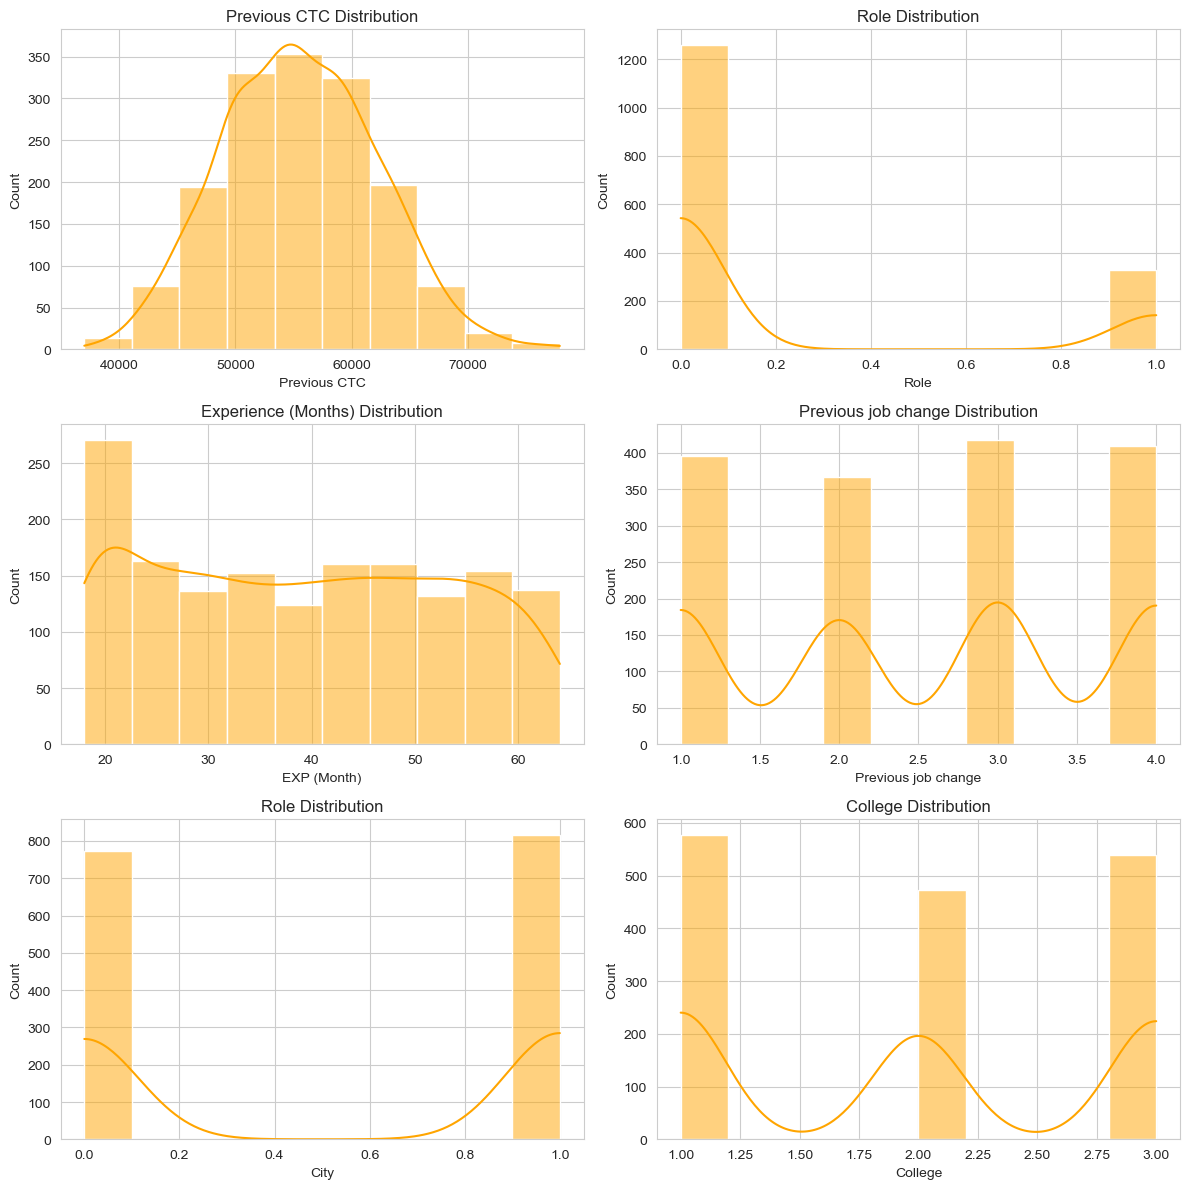

In [15]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
# Plot histograms for continuous variables
sns.histplot(df['Previous CTC'], bins=10, kde=True, ax=axs[0, 0],color='orange').set(title='Previous CTC Distribution')
sns.histplot(df['Role'], bins=10, kde=True, ax=axs[0, 1],color='orange').set(title='Role Distribution')
sns.histplot(df['EXP (Month)'], bins=10, kde=True, ax=axs[1, 0],color='orange').set(title='Experience (Months) Distribution')
sns.histplot(df['Previous job change'], bins=10, kde=True, ax=axs[1, 1],color='orange').set(title='Previous job change Distribution')
sns.histplot(df['City'], bins=10, kde=True, ax=axs[2, 0],color='orange').set(title='Role Distribution')
sns.histplot(df['College'], bins=10, kde=True, ax=axs[2, 1],color='orange').set(title='College Distribution')
plt.tight_layout()
plt.show()

<details>
  <summary style="font-weight: bold; cursor: pointer;">Conclusion</summary>
  <p>Role feature has high executive count  </p>
</details>

<h3 style="color: #4A4A4A;">Box Plot</h3>
Box plots provide a clear and concise visualization of data distribution, showing the central tendency (median), spread (interquartile range), and outliers, while also allowing for easy comparisons between groups and revealing data symmetry or skewness.

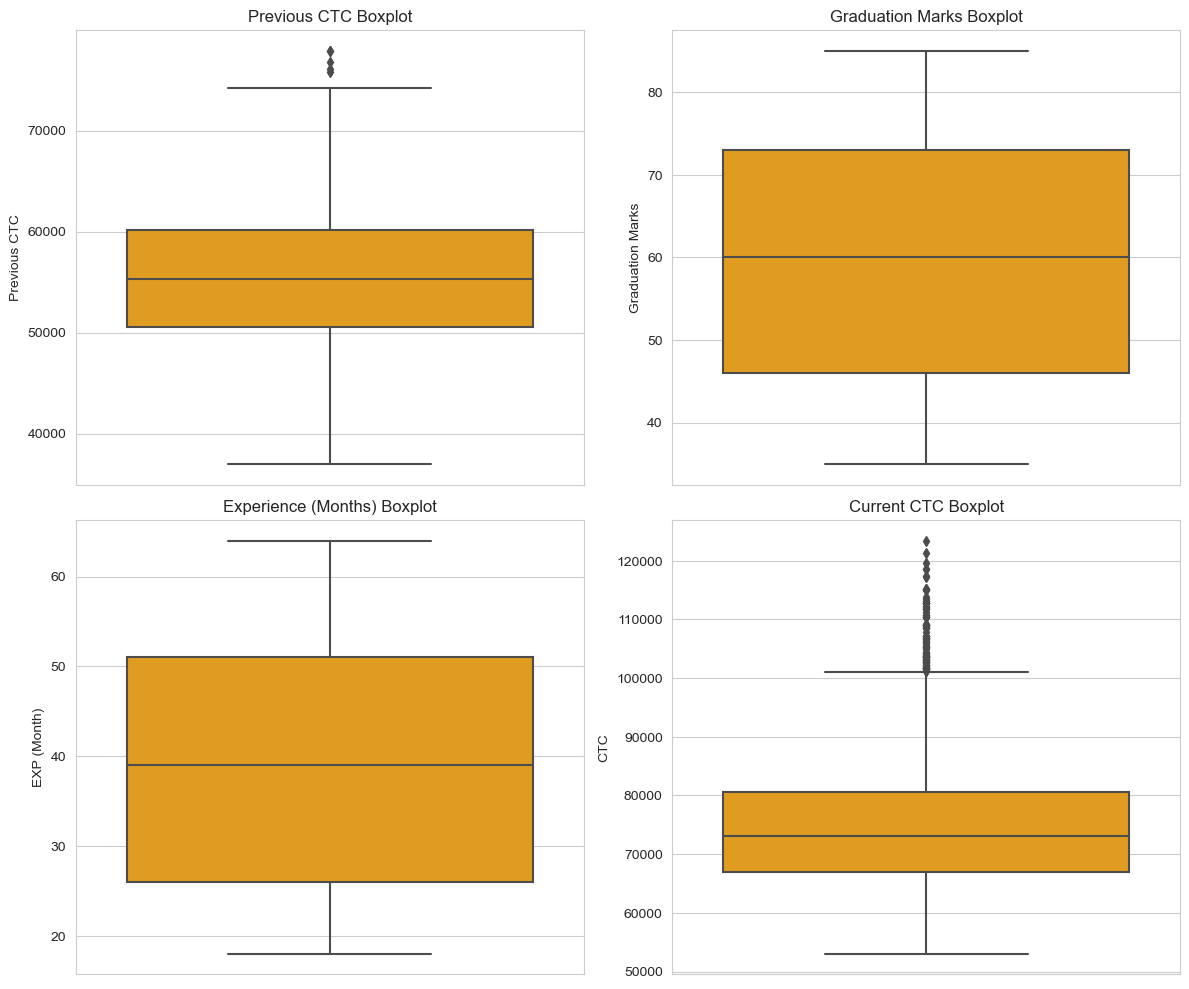

In [16]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define the color palette
orange_palette = sns.color_palette(['orange'])

# Plot box plots with orange color
sns.boxplot(y='Previous CTC', data=df, ax=axs[0, 0], palette=orange_palette).set(title='Previous CTC Boxplot')
sns.boxplot(y='Graduation Marks', data=df, ax=axs[0, 1], palette=orange_palette).set(title='Graduation Marks Boxplot')
sns.boxplot(y='EXP (Month)', data=df, ax=axs[1, 0], palette=orange_palette).set(title='Experience (Months) Boxplot')
sns.boxplot(y='CTC', data=df, ax=axs[1, 1], palette=orange_palette).set(title='Current CTC Boxplot')

# Adjust layout
plt.tight_layout()
plt.show()


<h3 style="color: #4A4A4A;">Joint plot to visualize the correaleation</h3>

#### EXP(Month) Vs CTC

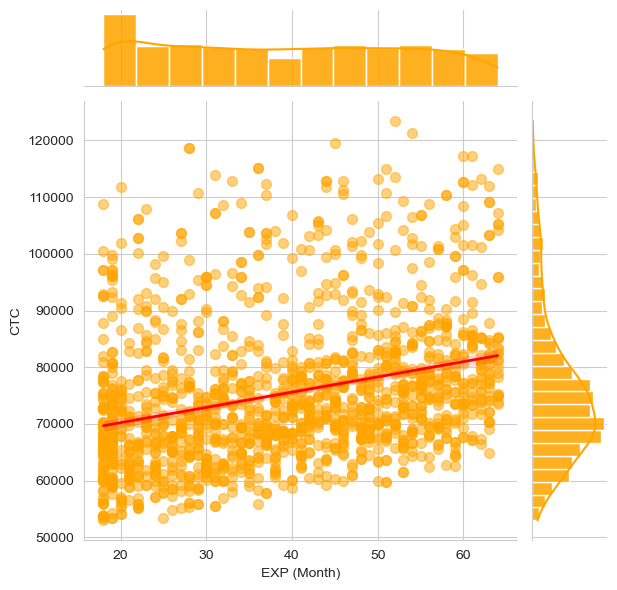

In [17]:
g = sns.jointplot(
    x='EXP (Month)', 
    y='CTC', 
    data=df, 
    kind='reg', 
    color='orange',
    scatter_kws={'s': 50, 'alpha': 0.5},  # Adjust size and transparency of data points
    line_kws={'color': 'red', 'linewidth': 2}  # Set color and linewidth of the regression line
)

# Set the colors for the marginal histograms
g.plot_marginals(sns.histplot, color='orange')

#### Previous CTC Vs CTC

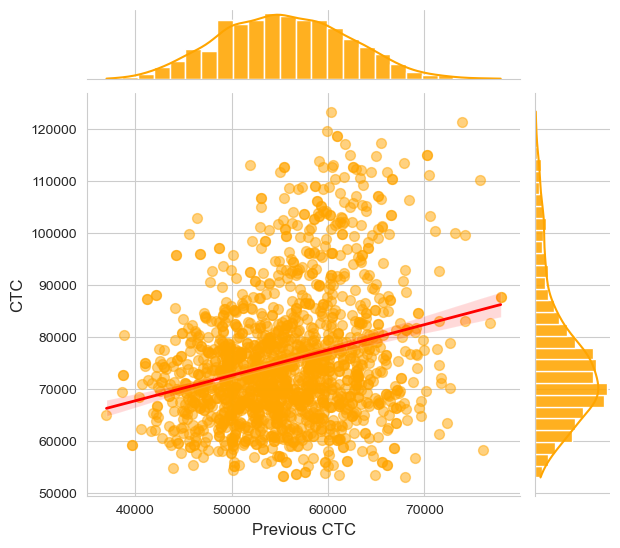

In [18]:
g = sns.jointplot(
    x='Previous CTC', 
    y='CTC', 
    data=df, 
    kind='reg', 
    color='orange',
    scatter_kws={'s': 50, 'alpha': 0.5},  # Adjust size and transparency of data points
    line_kws={'color': 'red', 'linewidth': 2}  # Set color and linewidth of the regression line
)

# Set the colors for the marginal histograms
g.plot_marginals(sns.histplot, color='orange')

# Adjust the plot appearance
g.ax_joint.set_xlabel('Previous CTC', fontsize=12)
g.ax_joint.set_ylabel('CTC', fontsize=12)

# Adjust layout to reduce clutter
plt.subplots_adjust(top=0.9)  # Increase space for the title

plt.show()

#### Graduation Marks Vs CTC

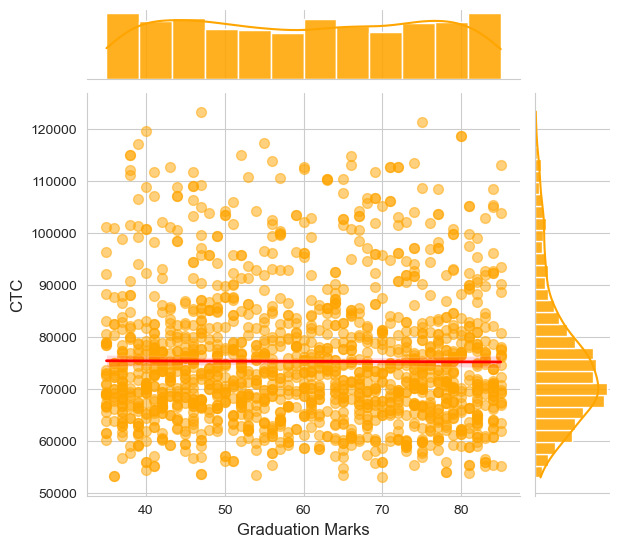

In [19]:
g = sns.jointplot(
    x='Graduation Marks', 
    y='CTC', 
    data=df, 
    kind='reg', 
    color='orange',
    scatter_kws={'s': 50, 'alpha': 0.5},  # Adjust size and transparency of data points
    line_kws={'color': 'red', 'linewidth': 2}  # Set color and linewidth of the regression line
)

# Set the colors for the marginal histograms
g.plot_marginals(sns.histplot, color='orange')

# Adjust the plot appearance
g.ax_joint.set_xlabel('Graduation Marks', fontsize=12)
g.ax_joint.set_ylabel('CTC', fontsize=12)
# Adjust layout to reduce clutter
plt.subplots_adjust(top=0.9)  # Increase space for the title

plt.show()


**Conclusion**:

* Exp(Month) and CTC has slightly Linear Relationship
* Previous(CTC) and CTC also has Linear Relationship
* Graduation Marks and CTC has No Relationship

<h3 style="color: #4A4A4A;">Heat Map Plotting for better understanding of correlation</h3>

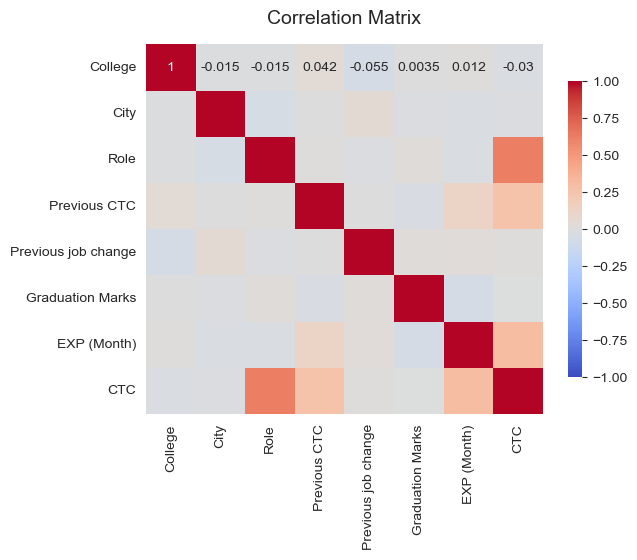

In [20]:
# Plot correlation matrix
corr = df.corr()

# Plot heatmap with a diverging colormap centered at 0
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Matrix', fontsize=14, pad=15)

# Display the plot
plt.show()

<details>
  <summary style="font-weight: bold; cursor: pointer;">Conclusion from above heat-map</summary>
  <p>The Role and Exp(Month) feature is highly and Previous CTC is slightly correleated to target feature </p>
</details>

<details>
  <summary style="font-weight: bold; cursor: pointer;">Variance Inflation Factor (VIF)</summary>
  <p>* VIF = 1: No multicollinearity.</p>
<p>*  1 < VIF < 5: Moderate multicollinearity.</p>
<p>* VIF > 5: High multicollinearity.</p>
<p>* VIF > 10: Considered severe multicollinearity and warrants corrective actions.</p>
</details>

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'df' is your DataFrame with predictors
X = add_constant(df.loc[:,df.columns !='CTC'])  # Adding constant term to the predictors
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

               Feature         VIF
0                const  103.084178
1              College    1.005379
2                 City    1.006306
3                 Role    1.004156
4         Previous CTC    1.017209
5  Previous job change    1.007050
6     Graduation Marks    1.005143
7          EXP (Month)    1.019515


**Conclusion from above VIF**:

All values lies between 1<VIF<5, so we have moderate level of multicollinearity

<h1 style="color:#2C3E50">FEATURE ENGINEERING/EXPLORING</h1>

**Splitting into Predictor and Target Value**

In [22]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,1,55523.0,3,66,19,71406.58
1,2,0,0,57081.0,1,84,18,68005.87
2,3,0,0,60347.0,2,52,28,76764.02
3,3,0,0,49010.0,2,81,33,82092.39
4,1,0,0,57879.0,4,74,32,73878.10


In [23]:
X_predictor=df.loc[:,df.columns !='CTC']
y_target=df['CTC']

In [24]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_predictor,y_target)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[0.03712015 0.02550215 0.38602748 0.23716818 0.05407914 0.09034388
 0.16975902]


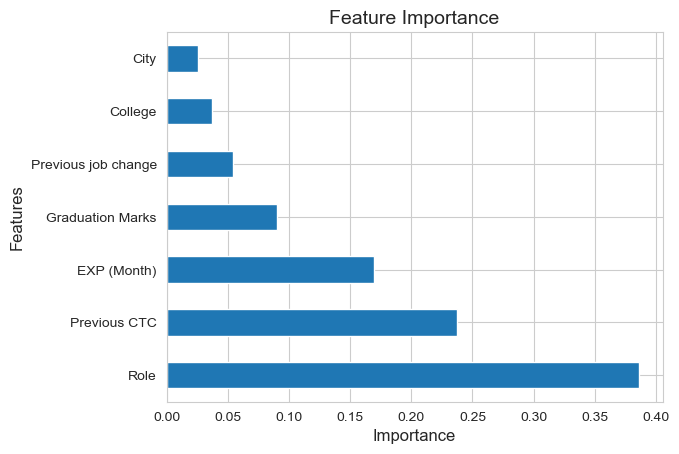

In [26]:
#plot graph of feature importances for better visualisation
feat_importances=pd.Series(model.feature_importances_,index=X_predictor.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.title('Feature Importance', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

<details>
  <summary style="font-weight: bold; cursor: pointer;">Conclusion</summary>
  <p>In dataset City is the least important feature and Role is most important feature</p>
</details>


In [27]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,1,55523.0,3,66,19,71406.58
1,2,0,0,57081.0,1,84,18,68005.87
2,3,0,0,60347.0,2,52,28,76764.02
3,3,0,0,49010.0,2,81,33,82092.39
4,1,0,0,57879.0,4,74,32,73878.10


<h1 style="color:#2C3E50">LET'S START MODELLING </h1>

In [28]:
#Evaluation Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
#Splitting data into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X_predictor, y_target, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X= scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h3 style="color: #4A4A4A;">OLS Model</h3>

In [31]:
import statsmodels.api as sm

In [32]:
# Add a constant to the model (intercept)
x = sm.add_constant(X_predictor)

# Fit the OLS model
model = sm.OLS(y_target, x).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          4.70e-257
Time:                        16:22:01   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2

<h3 style="color: #4A4A4A;">Linear Regression</h3>

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# Initialize and train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
# Make predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
lr_score=lr.score(X_train,y_train)
# Print the results
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Linear Regression score:",lr_score)

Coefficients: [-435.09743711  241.31880694 7471.39306988 2802.97570998    9.81979783
   29.0192253  3467.75304336]
Intercept: 75284.838245476
Mean Squared Error: 77362774.94956557
R^2 Score: 0.5933517958385082
Linear Regression score: 0.5137747142134839


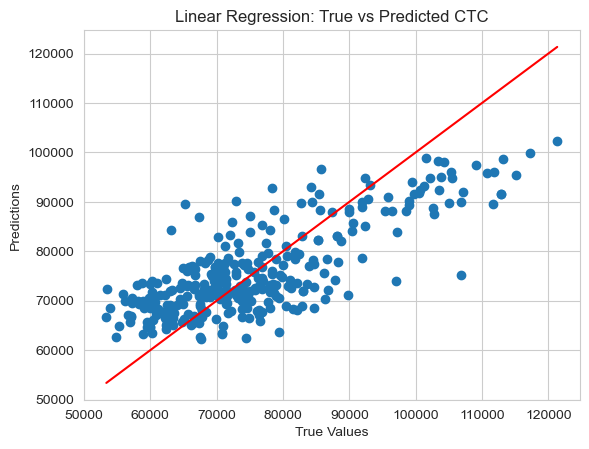

In [36]:
# Plot true vs predicted values
plt.scatter(y_test, y_pred_lr)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: True vs Predicted CTC')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for reference
plt.show()

<details>
  <summary style="font-weight: bold; cursor: pointer;">From above data we can see the mean squared value is very high. Some of the reason of high mse could be the: </summary>
  <p>1. Underfitting</p>
<p>2. Insufficient Data</p>
<p>3. Outliers</p>
</details>

<h3 style="color: #4A4A4A;">Regularization Techniques</h3>

* Ridge Regression
* Lasso Regression

<h4><span style="color: #b8860b;">RIDGE REGRESSION</span> </h4>

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Instantiate and fit the Ridge regression model on the standardized data
ridge_model = Ridge(alpha=1.0)  # You can specify the value of alpha
ridge_model.fit(X_train_scaled, y_train)

Ridge()

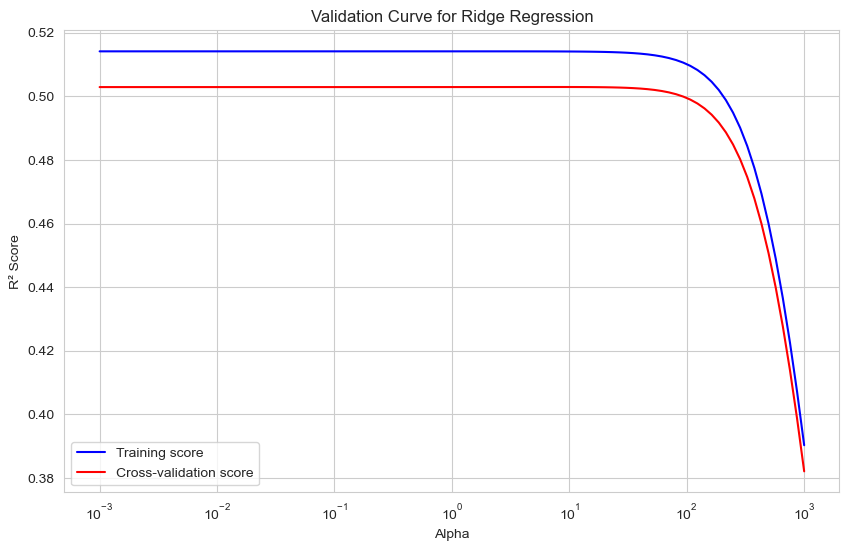

Best Alpha: 7.56463327554629


In [39]:
# Define the range of alpha values to test
alphas = np.logspace(-3, 3, 100)  # Adjust the range as needed
# Calculate validation curve
train_scores, valid_scores = validation_curve(ridge_model, X_train_scaled, y_train,
                                              param_name="alpha",
                                              param_range=alphas,
                                              scoring="r2",
                                              cv=5)

# Calculate mean R² scores across folds
mean_train_scores = np.mean(train_scores, axis=1)
mean_valid_scores = np.mean(valid_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_train_scores, label="Training score", color="blue")
plt.plot(alphas, mean_valid_scores, label="Cross-validation score", color="red")
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("Validation Curve for Ridge Regression")
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.show()

# Find the value of alpha with maximum cross-validation score
best_alpha = alphas[np.argmax(mean_valid_scores)]
print("Best Alpha:", best_alpha)

In [40]:
#Model Fitting
ridge_model = Ridge(alpha=7.56463327554629)  # You can specify the value of alpha
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=7.56463327554629)

In [41]:
#Evaluation
ridge_r2=r2_score(y_test,ridge_model.predict(X_test_scaled))
ridge_mse = mean_squared_error(y_test,ridge_model.predict(X_test_scaled))
ridge_rmse=ridge_mse*0.5

print("RIDGE MODEL:")
print(f"R-squared: {ridge_r2}")
print(f"Mean Squared Error: {ridge_mse}", )
print(f'Root Mean Squared Error: {ridge_rmse}')


RIDGE MODEL:
R-squared: 0.5923097881378738
Mean Squared Error: 77561011.6721551
Root Mean Squared Error: 38780505.83607755


<h4><span style="color: #b8860b;">LASSO REGRESSION</span> </h4>

In [42]:
from sklearn.linear_model import Lasso

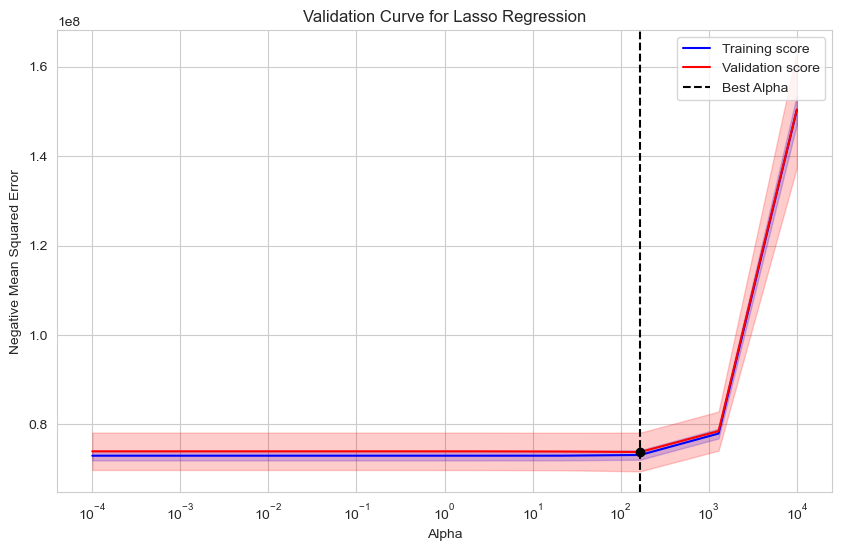

Best Alpha Value: 166.81005372000558


In [43]:

# Define the range of alpha values to test
param_range = np.logspace(-4, 4, 10)

# Calculate validation curve
train_scores, test_scores = validation_curve(
    Lasso(),
    X_train_scaled, y_train,
    param_name="alpha",
    param_range=param_range,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    cv=5
)

# Calculate the mean and standard deviation of the training and testing scores
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Find the index of the minimum test score
best_index = np.argmin(test_scores_mean)
best_alpha = param_range[best_index]



# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.semilogx(param_range, train_scores_mean, label='Training score', color='blue')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.2)
plt.semilogx(param_range, test_scores_mean, label='Validation score', color='red')
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='red', alpha=0.2)

# Mark the best alpha value
plt.axvline(best_alpha, linestyle='--', color='black', label='Best Alpha')
plt.scatter(best_alpha, test_scores_mean[best_index], color='black', zorder=5)

plt.title('Validation Curve for Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print("Best Alpha Value:", best_alpha)


In [44]:
#Model Fitting
lasso_model = Lasso(alpha=166.81005372000558)  # You can specify the value of alpha
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=166.81005372000558)

In [45]:
#Evaluation
lasso_r2=r2_score(y_test,lasso_model.predict(X_test_scaled))
lasso_mse = mean_squared_error(y_test,lasso_model.predict(X_test_scaled))
lasso_rmse=ridge_mse*0.5

print("LASSO MODEL:")
print(f"R-squared: {lasso_r2}")
print(f"Mean Squared Error: {lasso_mse}", )
print(f'Root Mean Squared Error: {lasso_rmse}')


LASSO MODEL:
R-squared: 0.588272126008605
Mean Squared Error: 78329156.57832308
Root Mean Squared Error: 38780505.83607755


<h3 style="color: #4A4A4A;">ENSEMBLE METHOD</h3>

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
# Initializing and training the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
rf_r2=r2_score(y_test,y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = mse ** 0.5


print("RANDOM FOREST:")
print(f"R-squared: {rf_r2}")
print(f"Mean Squared Error: {rf_mse}", )
print(f'Root Mean Squared Error: {rf_rmse}')

RANDOM FOREST:
R-squared: 0.6415053572367465
Mean Squared Error: 68201802.15945193
Root Mean Squared Error: 8795.611118595772


<h1 style="color:#2C3E50">COMPARING THE MODELS TO GET BEST MODEL OUT OF ALL</h1>

In [48]:
# Performance metrics for each model
performance_data = {
    'Model': ['Ridge', 'Lasso','Random Forest'],
    'R-Squared': [ridge_r2, lasso_r2, rf_r2],
    'Mean Squared Error': [ridge_mse, lasso_mse, rf_mse],
    'Root Mean Squared Error': [ridge_rmse, lasso_rmse, rf_rmse]
}

# Create a DataFrame from the performance data
performance_df = pd.DataFrame(performance_data)


In [49]:
performance_df.head()

,Model,R-Squared,Mean Squared Error,Root Mean Squared Error
0,Ridge,0.592310,7.756101e+07,3.878051e+07
1,Lasso,0.588272,7.832916e+07,3.878051e+07
2,Random Forest,0.641505,6.820180e+07,8.795611e+03


<h3 style="color: #4A4A4A;">Comparing Model on basis of their prediction by chart visual</h3>

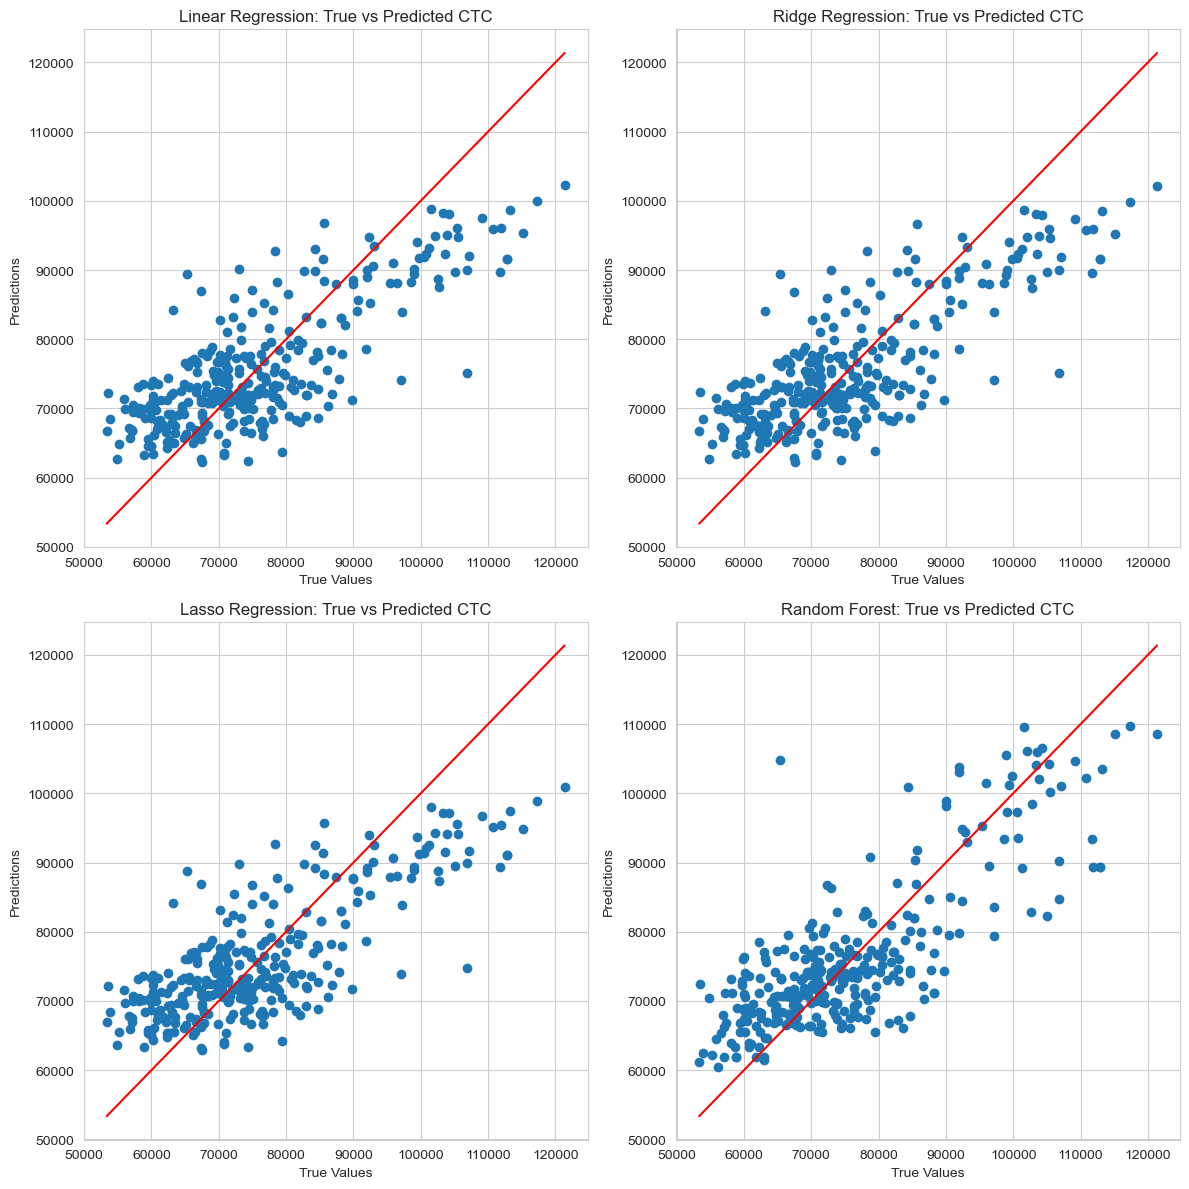

In [50]:
# Create subplots: 3 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Linear Regression
axes[0, 0].scatter(y_test, lr.predict(X_test))
axes[0, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
axes[0, 0].set_title('Linear Regression: True vs Predicted CTC')
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predictions')

# Ridge Regression
axes[0, 1].scatter(y_test, ridge_model.predict(X_test_scaled))
axes[0, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
axes[0, 1].set_title('Ridge Regression: True vs Predicted CTC')
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Predictions')

# Lasso Regression
axes[1, 0].scatter(y_test, lasso_model.predict(X_test_scaled))
axes[1, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
axes[1, 0].set_title('Lasso Regression: True vs Predicted CTC')
axes[1, 0].set_xlabel('True Values')
axes[1, 0].set_ylabel('Predictions')

# Random Forest
axes[1,1].scatter(y_test, model.predict(X_test))
axes[1,1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
axes[1,1].set_title('Random Forest: True vs Predicted CTC')
axes[1,1].set_xlabel('True Values')
axes[1,1].set_ylabel('Predictions')

# Remove empty subplot and adjust layout

plt.tight_layout()
plt.show()

<details>
  <summary style="font-weight: bold; cursor: pointer;">Conclusion</summary>
  <p>From above comparision we found Random Forest is best fit model </p>
</details>



<h1 style="color:#2C3E50">INPUT PREDICTOR VALUE</h1>

In [51]:
import joblib
# Load the saved model
model = joblib.load('random_forest_model.pkl')

# Function to predict CTC given input features
def predict_ctc(input_data):
    input_data = np.array(input_data).reshape(1, -1)
    prediction = model.predict(input_data)
    return prediction[0]
def collect_input():
    print("Please enter the following details:")
    college = int(input("College=For (Tier1:1, Tier2:2 & Tier3:3): "))
    city = int(input("CITY = For( Tier1:1 & Tier2:0):"))
    role = int(input("Role= For (Manager-0 & Executive-1): "))
    previous_ctc = float(input("Previous CTC (e.g., 56000): "))
    previous_job_change = int(input("Previous Job Change (between 1-3): "))
    graduation_marks = int(input("Graduation Marks (Not exceeds more than 100): "))
    exp_month = int(input("Experience in Months (e.g., 24): "))
    
    return [college, city, role, previous_ctc, previous_job_change, graduation_marks, exp_month]

# Example input data
input_features = collect_input()  # Modify this list with your input data
predicted_ctc = predict_ctc(input_features)
print(f"Predicted CTC: {predicted_ctc}")

Please enter the following details:


College=For (Tier1:1, Tier2:2 & Tier3:3):  2
CITY = For( Tier1:1 & Tier2:0): 1
Role= For (Manager-0 & Executive-1):  1
Previous CTC (e.g., 56000):  3800
Previous Job Change (between 1-3):  1
Graduation Marks (Not exceeds more than 100):  98
Experience in Months (e.g., 24):  24


Predicted CTC: 106396.36350000002


# Q.1- Your views about the problem statement?
As TechWorks is a consulting company who provides top-notch  IT talent to variety of business, to improvising the Machine Learning model to predict the accurate salary will help them in providing better service to other companies. Improvising ML model leads to :
* Improving Recruitment process : By predicting the salary of newly hired employees which will lead to better recruitment outcomes.
* 
Fairness and Transparency : It helps in mitigating biases and ensures that compensation decisions are based on objective criteri.
* 
Scalability and Efficiency: Once developed, a machine learning model for salary prediction can be applied to a large number of job openings and candidates, making the recruitment process more scalable and efficien
* Market Competitiveness
*  Cost Optimization
*   Higher Employee Satisfaction and Retentiont
### ---------------------------------------------------------------------------
Developing and enhancing an ML model for salary prediction can significantly transform the recruitment and compensation landscape for TechWorks Consulting and its clients. By leveraging data-driven insights, companies can achieve better recruitment outcomes, ensure fairness and transparency in compensation, optimize costs, and improve overall HR efficiency. This strategic investment in technology not only enhances current practices but also positions companies to be more competitive and responsive to future market dynamics..


# Q.2- What will be your approach to solving this task?

Approach to Create a Machine Learning Model for Salary Prediction
1. Data Collection : Gather historical data on employee salaries along with relevant features that might influence salary levels.
2. Data Preprocessing: Cleaning the Data >> Feature Engineering >> Encoding >> Normalization.
3. Feature Selection : Feature selection is the process of selecting a subset of relevant and significant features (variables) from the original dataset to be used as inputs to a machine learning model. The goal is to improve the model’s performance by eliminating redundant or irrelevant features, thereby enhancing the model’s accuracy, efficiency, and interpretability.
4. Model Selection : Choosing suitable regression model according to the type of data and others matrices in our data.For eg: there was multicollinearity in our data and best method for our data could be REGULARIZATIONS TECHNIQUES and ENSEMBLE METHODS as both are unaffected by this
5. Model Evaluation: Evaluate model performance on the testing set using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²). Ensure the model is not overfitting or underfitting.

# Q.3- What were the available ML model options you had to perform this task?

As in our data is continous and we have moderate level of multicollinearity in our data and for that we have four different methods and from them I chose two methods that is below:
1. Regularization Techniques : Regularization methods add a penalty to the regression model to reduce the complexity and prevent overfitting. They are particularly effective in dealing with multicollinearity.We have Ridge,Lasso and Elastic Net Regression from them I chose Ridge.
2.  Ensemble Methods:Ensemble learning methods can also help mitigate the effects of multicollinearity.We have Random Forest.Random Forests are robust to multicollinearity because they are based on bagging, which reduces overfitting by averaging predictions from different trees that may not include all correlated features.
   
NOTE: Random Forests offer robustness and flexibility in handling complex datasets with multicollinearity.

# Q.4- . Which model’s performance is best and what could be the possible reason for that?

From above model we can see RANDOM FOREST MODEL performing the best.
The possible reason for that can be:
1. Random Forest is good in model Complexity and flexibity.
2. Handling High Dimensional Data :  Random Forests are generally robust to multicollinearity because they aggregate results from multiple trees, which reduces the impact of correlated features on the overall prediction.
3.  Variance and Bias Trade-off: Random forest has low variance and moderate bias where as Ridge regression has High bias and low variance.
4. Random forest is better in Noise handling than Ridge regression.

# Q.5- What steps can you take to improve this selected model’s performance even further?

To improve this selected model's performance further:
1. Increase Data: More data can improve model performance because it provides the model with more examples to learn from
2. Feature Engineering: Removing reduntant or irrelevant ones and retain with most relevant features.
3. Addressing Overfitting and Underfitting
4. Hyperparameters Tuning: Use technique like GridSearchCV and other method find the best parameters for your model.